In [10]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline 
from numpy.polynomial.polynomial import polyfit
import scipy.stats as st

# Read in CSV File
cases_df = pd.read_csv("output_data/oxford_clean3.csv")

# Convert Date object to datetime format
cases_df['Date'] = pd.to_datetime(cases_df['Date'], format='%Y%m%d')

# Countries' Total Cases over Time 

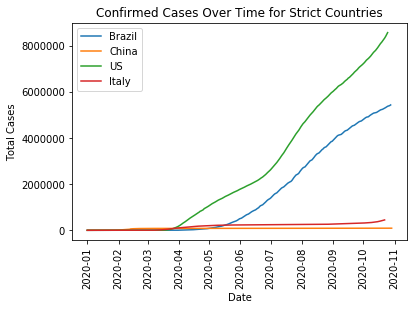

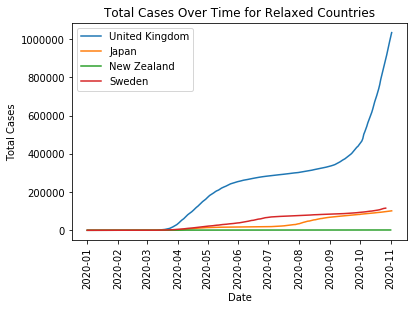

In [11]:
# Locate the Confirmed Cases data for Countries w/ Strict Mandates
fig, ax = plt.subplots()
brazil = cases_df.loc[cases_df['CountryName']=='Brazil']
ax.plot(brazil['Date'],brazil['ConfirmedCases'], label = 'Brazil')
china = cases_df.loc[cases_df['CountryName']=='China']
ax.plot(china['Date'],china['ConfirmedCases'],label='China')
us = cases_df.loc[cases_df['CountryName']=='United States']
ax.plot(us['Date'],us['ConfirmedCases'],label='US')
italy = cases_df.loc[cases_df['CountryName']=='Italy']
ax.plot(italy['Date'],italy['ConfirmedCases'],label='Italy')

# Plot the Confirmed Cases for "Strict" Countries 
plt.xticks(rotation='vertical')
plt.title('Confirmed Cases Over Time for Strict Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/cases_time_strict.png')
plt.show()


# Run the same functions for "Relaxed" Mandates
fig, ax = plt.subplots()
uk = cases_df.loc[cases_df['CountryName']=='United Kingdom']
ax.plot(uk['Date'],uk['ConfirmedCases'],label='United Kingdom')
japan = cases_df.loc[cases_df['CountryName']=='Japan']
ax.plot(japan['Date'],japan['ConfirmedCases'],label='Japan')
nz = cases_df.loc[cases_df['CountryName']=='New Zealand']
ax.plot(nz['Date'],nz['ConfirmedCases'],label='New Zealand')
sweden = cases_df.loc[cases_df['CountryName']=='Sweden']
ax.plot(sweden['Date'],sweden['ConfirmedCases'],label='Sweden')
plt.xticks(rotation='vertical')
plt.title('Total Cases Over Time for Relaxed Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/cases_time_relax.png')
plt.show()

# Countries' Total Deaths over Time

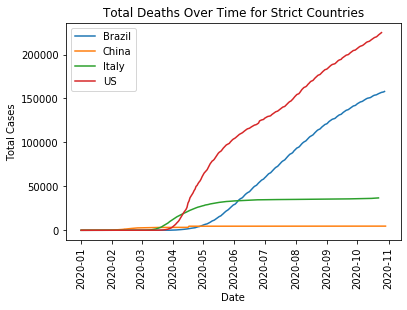

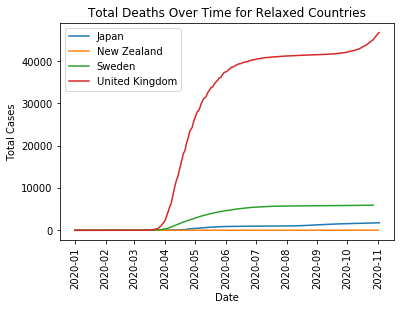

In [12]:
# Locate the Confirmed Deaths for the "Strict Countries"
fig, ax = plt.subplots()
brazil = cases_df.loc[cases_df['CountryName']=='Brazil']
ax.plot(brazil['Date'],brazil['ConfirmedDeaths'], label = 'Brazil')
china = cases_df.loc[cases_df['CountryName']=='China']
ax.plot(china['Date'],china['ConfirmedDeaths'],label='China')
italy = cases_df.loc[cases_df['CountryName']=='Italy']
ax.plot(italy['Date'],italy['ConfirmedDeaths'],label='Italy')
us = cases_df.loc[cases_df['CountryName']=='United States']
ax.plot(us['Date'],us['ConfirmedDeaths'],label='US')

# Plot the Confirmed Deaths for "Strict" Countries
plt.xticks(rotation='vertical')
plt.title('Total Deaths Over Time for Strict Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/deaths_time_strict.png')
plt.show()

# Run the same functions for "Relaxed" Countries
fig, ax = plt.subplots()
japan = cases_df.loc[cases_df['CountryName']=='Japan']
ax.plot(japan['Date'],japan['ConfirmedDeaths'],label='Japan')
nz = cases_df.loc[cases_df['CountryName']=='New Zealand']
ax.plot(nz['Date'],nz['ConfirmedDeaths'],label='New Zealand')
sweden = cases_df.loc[cases_df['CountryName']=='Sweden']
ax.plot(sweden['Date'],sweden['ConfirmedDeaths'],label='Sweden')
uk = cases_df.loc[cases_df['CountryName']=='United Kingdom']
ax.plot(uk['Date'],uk['ConfirmedDeaths'],label='United Kingdom')
plt.xticks(rotation='vertical')
plt.title('Total Deaths Over Time for Relaxed Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/deaths_time_relax.png')
plt.show()

# Determining Countries' Cases and Deaths by Per Capita

In [13]:
#The values below are from "worldometers.info"
# Total populations as of Jan 1, 2020.
braz_pop = 212559417
china_pop = 1408526449
ital_pop = 60005743
jp_pop = 125938348
nz_pop = 4822233
swe_pop = 10151866
uk_pop = 66575226
us_pop = 330380000

# Create a list containing the total populations of each conutry
pops = (212559417, 1408526449, 60005743, 125938348, 4822233, 10151866, 66575226, 330380000)

# Locate the most recent date data is available for all countries
last_df = cases_df.loc[cases_df['Date']=='2020-10-22']

# Add a column to the new DF containing total populations for analysis purposes
last_df["total_pop"] = pops
last_df = last_df.set_index('CountryName')
last_df

/opt/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths,total_pop
CountryName,,,,,,,,,,
Brazil,2020-10-22,3.0,2.0,2.0,1.0,0.000000e+00,4.0,5298772.0,155403.0,212559417
China,2020-10-22,1.0,2.0,3.0,1.0,0.000000e+00,2.0,91044.0,4739.0,1408526449
United Kingdom,2020-10-22,3.0,2.0,1.0,2.0,5.305826e+09,3.0,789229.0,44158.0,60005743
Italy,2020-10-22,1.0,2.0,0.0,1.0,0.000000e+00,3.0,449648.0,36832.0,125938348
Japan,2020-10-22,1.0,1.0,1.0,1.0,0.000000e+00,1.0,94524.0,1685.0,4822233
New Zealand,2020-10-22,0.0,0.0,0.0,2.0,0.000000e+00,1.0,1558.0,25.0,10151866
Sweden,2020-10-22,0.0,1.0,0.0,2.0,0.000000e+00,0.0,109326.0,5917.0,66575226
United States,2020-10-22,3.0,2.0,2.0,2.0,0.000000e+00,4.0,8336282.0,222201.0,330380000


In [14]:
# Calculate the Percentage of Each Country Infected and Deceased
perc_cases = (last_df["ConfirmedCases"]/last_df["total_pop"])
perc_deaths = (last_df["ConfirmedDeaths"]/last_df["total_pop"])

# Create a DataFrame to hold these values
perc_summ = pd.DataFrame({'Percent_Infected':perc_cases, 'Percent_Deceased':perc_deaths})
perc_summ.style.format({"Percent_Infected":"{:.6%}", "Percent_Deceased":"{:.6%}"})

,Percent_Infected,Percent_Deceased
CountryName,,
Brazil,2.492843%,0.073110%
China,0.006464%,0.000336%
United Kingdom,1.315256%,0.073590%
Italy,0.357038%,0.029246%
Japan,1.960171%,0.034942%
New Zealand,0.015347%,0.000246%
Sweden,0.164214%,0.008888%
United States,2.523241%,0.067256%


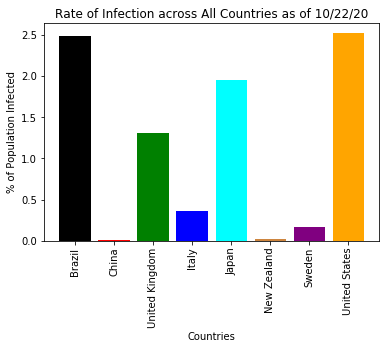

In [15]:
# Rate of Infection across All Countries
plt.bar(perc_summ['Percent_Infected'].index,perc_summ['Percent_Infected']*100,\
        color=['black', 'red', 'green', 'blue', 'cyan','peru','purple','orange'])
plt.xticks(rotation='vertical')
plt.title('Rate of Infection across All Countries as of 10/22/20')
plt.xlabel('Countries')
plt.ylabel('% of Population Infected')
plt.savefig('Figures/cases_perc.png')

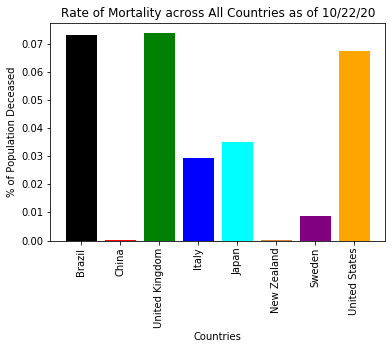

In [16]:
# Rate of Mortality across All Countries
plt.bar(perc_summ['Percent_Infected'].index,perc_summ['Percent_Deceased']*100,\
        color=['black', 'red', 'green', 'blue', 'cyan','peru','purple','orange'])
plt.xticks(rotation='vertical')
plt.title('Rate of Mortality across All Countries as of 10/22/20')
plt.xlabel('Countries')
plt.ylabel('% of Population Deceased')
plt.savefig('Figures/deaths_perc.png')

# Statistical Analysis
Testing our Hypothesis for Infection Rate (2-Sample T-Test)

In [17]:
# Determine the mean infection rate for strict countries
strict_inf = perc_summ.iloc[[0,1,3,7],0:1]
strict_mean = strict_inf.mean()
print(f'Strict {strict_mean*100}')

# Determine the mean infection rate for relaxed countries
relax_inf = perc_summ.iloc[[2,4,5,6],0:1]
relax_mean = relax_inf.mean()
print(f'Relaxed {relax_mean*100}')

#Calculate Independent T-test (p-value = 0.05)
# Code for T-test runs but is not printed for formatting purposes.
st.ttest_ind(strict_inf, relax_inf, equal_var=False)
print('The resulting p-value was 0.58177003')

Strict Percent_Infected    1.344896
dtype: float64
Relaxed Percent_Infected    0.863747
dtype: float64
The resulting p-value was 0.58177003


Testing our Hypothesis for Mortality Rate (2-Sample T-Test)

In [18]:
# Determine the mean mortality rate for strict countries
strict_dth = perc_summ.iloc[[0,1,3,7],-1:]
strict_mean = strict_dth.mean()
print(f'Strict {strict_mean*100}')

# Determine the mean infection rate for relaxed countries
relax_dth = perc_summ.iloc[[2,4,5,6],-1:]
relax_mean = relax_dth.mean()
print(f'Relaxed {relax_mean*100}')

# Calculate Independent T-test (p-value = 0.05)
# Code for T-test runs but is not printed for formatting purposes.
st.ttest_ind(strict_dth, relax_dth, equal_var=False)
print('The resulting p-value was 0.60168065')

Strict Percent_Deceased    0.042487
dtype: float64
Relaxed Percent_Deceased    0.029416
dtype: float64
The resulting p-value was 0.60168065
